In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp, enums as viz_enums
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types, plot_styles
from pathlib import Path

In [59]:
demand = dummy_data.create_dummy_site_demand(2022)

save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)

### Data cleaner

In [60]:
cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

test = sdp.DataPrep(bender_submeters, cleaner_list)

Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694


Post cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,3.871877,0.723830,0.321299,0.636369,0.025243,1.203781,0.509493,0.177645
StD,3.616988,0.173279,0.580963,0.072358,0.002469,0.083532,0.122784,0.330845
Min,0.238472,0.430443,0.035838,0.453167,0.018273,1.058588,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.018813,1.060478,0.384565,0.040023
25%,0.793048,0.611870,0.038633,0.580715,0.024502,1.149817,0.422485,0.046129
50%,2.446349,0.673542,0.040107,0.668476,0.025496,1.220203,0.482347,0.050143
75%,6.058010,0.775172,0.216827,0.685800,0.026099,1.269096,0.548906,0.116300
99%,13.523658,1.259118,2.419109,0.830969,0.033966,1.307534,1.018762,1.767503


In [61]:
sub_set_1 = bender_submeters.iloc[:, :4]
sub_set_2 = bender_submeters.iloc[:, 4:]

test_data_prep = sdp.DataPrep(sub_set_1,
                      cleaner_list)

test_2 = sdp.DataPrep(sub_set_2,
                      cleaner_list)

test_data_prep = test_data_prep.concat(test_2)

Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5
Count,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000
Mean,4.197614,0.833613,0.682970,0.640112
StD,4.335921,0.379993,1.065927,0.078980
Min,0.238472,0.430443,0.035838,0.453167
1%,0.313950,0.475305,0.036824,0.498025
25%,0.793048,0.613206,0.038633,0.580715
50%,2.450148,0.682368,0.040107,0.668872
75%,6.212515,0.885478,1.018641,0.686295
99%,17.665151,2.259092,3.377291,0.858160


Post cleaning:


,DB_11,DB_3,DB_4,DB_5
Count,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000
Mean,3.871877,0.723830,0.321299,0.636369
StD,3.616988,0.173279,0.580963,0.072358
Min,0.238472,0.430443,0.035838,0.453167
1%,0.313950,0.475305,0.036824,0.498025
25%,0.793048,0.611870,0.038633,0.580715
50%,2.446349,0.673542,0.040107,0.668476
75%,6.058010,0.775172,0.216827,0.685800
99%,13.523658,1.259118,2.419109,0.830969


Prior to cleaning:


,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000
Mean,0.225324,1.463343,0.820420,0.886015
StD,0.537946,1.049702,0.762795,1.426734
Min,0.000000,1.028566,0.364034,0.039552
1%,0.010134,1.041814,0.384565,0.040023
25%,0.024653,1.188752,0.422485,0.046133
50%,0.025688,1.230843,0.493701,0.050163
75%,0.028907,1.275557,0.702320,0.898992
99%,2.359133,7.174533,3.867978,4.021694


Post cleaning:


,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000
Mean,0.025243,1.203781,0.509493,0.177645
StD,0.002469,0.083532,0.122784,0.330845
Min,0.018273,1.058588,0.364034,0.039552
1%,0.018813,1.060478,0.384565,0.040023
25%,0.024502,1.149817,0.422485,0.046129
50%,0.025496,1.220203,0.482347,0.050143
75%,0.026099,1.269096,0.548906,0.116300
99%,0.033966,1.307534,1.018762,1.767503


Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,3.871877,0.723830,0.321299,0.636369,0.025243,1.203781,0.509493,0.177645
StD,3.616988,0.173279,0.580963,0.072358,0.002469,0.083532,0.122784,0.330845
Min,0.238472,0.430443,0.035838,0.453167,0.018273,1.058588,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.018813,1.060478,0.384565,0.040023
25%,0.793048,0.611870,0.038633,0.580715,0.024502,1.149817,0.422485,0.046129
50%,2.446349,0.673542,0.040107,0.668476,0.025496,1.220203,0.482347,0.050143
75%,6.058010,0.775172,0.216827,0.685800,0.026099,1.269096,0.548906,0.116300
99%,13.523658,1.259118,2.419109,0.830969,0.033966,1.307534,1.018762,1.767503


No data preparation functions provided. Data will not be cleaned.


### DataManip

In [62]:
metadata_dict = {'DB_11': {'Name': 'DB_11', 
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_3': {'Name': 'DB_3',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_4': {'Name': 'DB_4',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_5': {'Name': 'DB_5',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_6': {'Name': 'DB_6',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_9': {'Name': 'DB_9',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_10': {'Name': 'DB_10',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_12': {'Name': 'DB_12',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT}}

In [63]:
meta_data = sdp.MetaData(metadata_dict)

new_test = sdp.DataManip(test_data_prep.data, column_meta_data=meta_data)

In [64]:
meta_data.freq('DB_11')

'30T'

In [65]:
metadata_dict['DB_11'][viz_schema.MetaDataSchema.FREQ]

'30T'

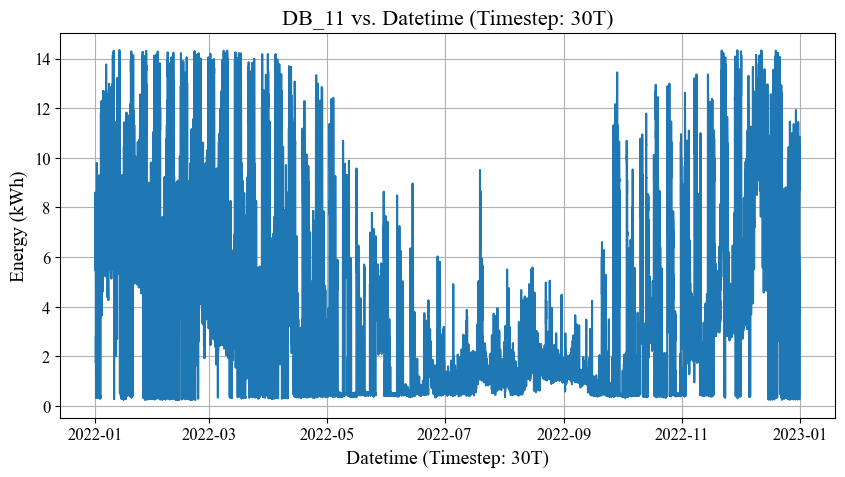

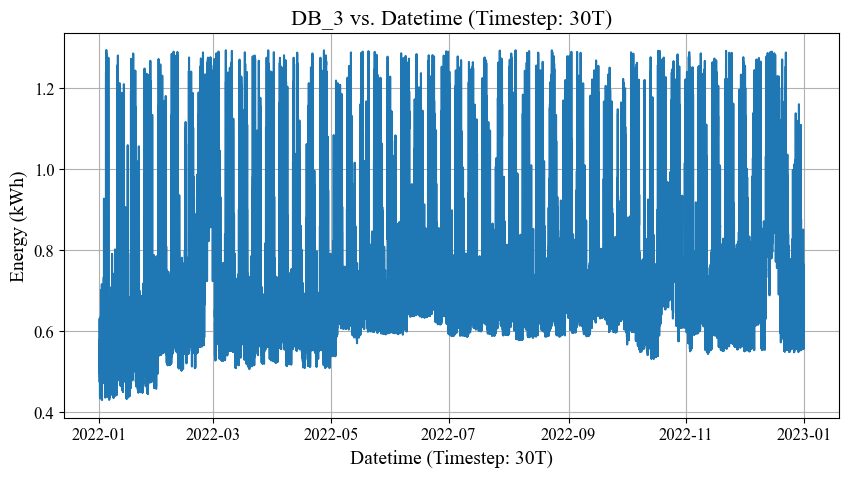

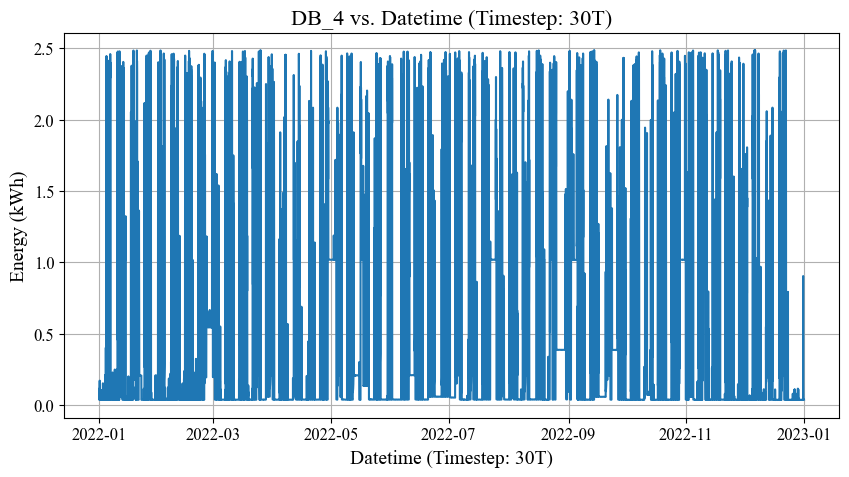

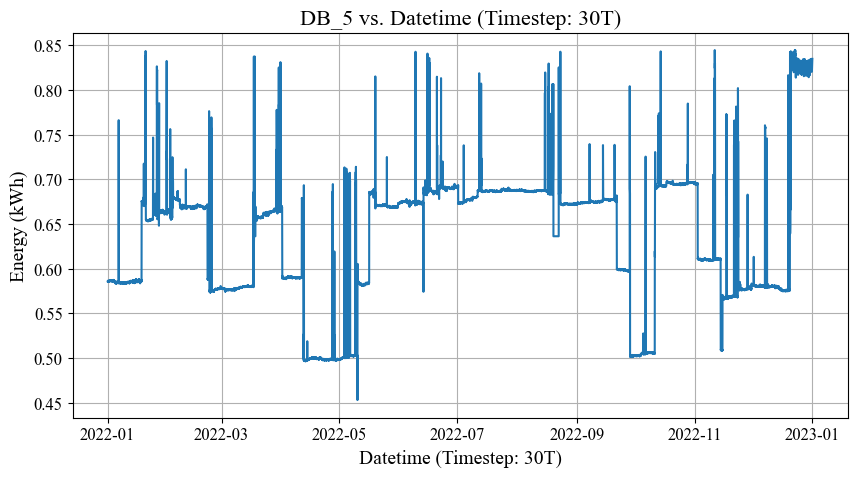

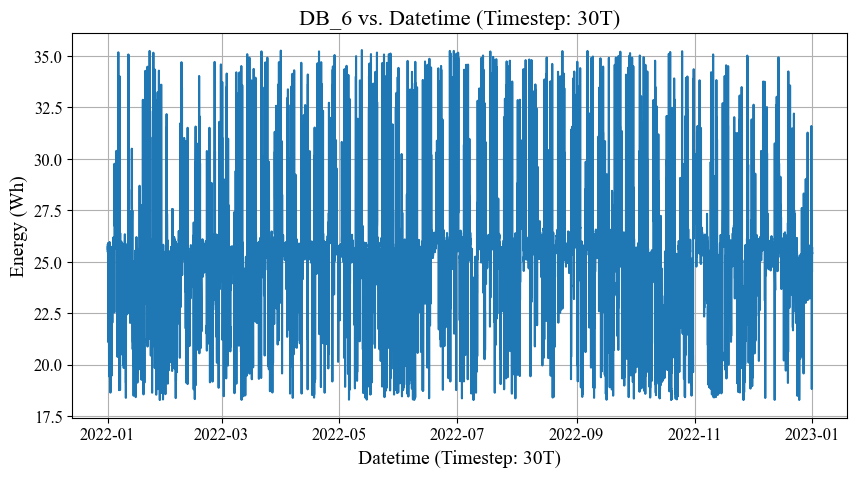

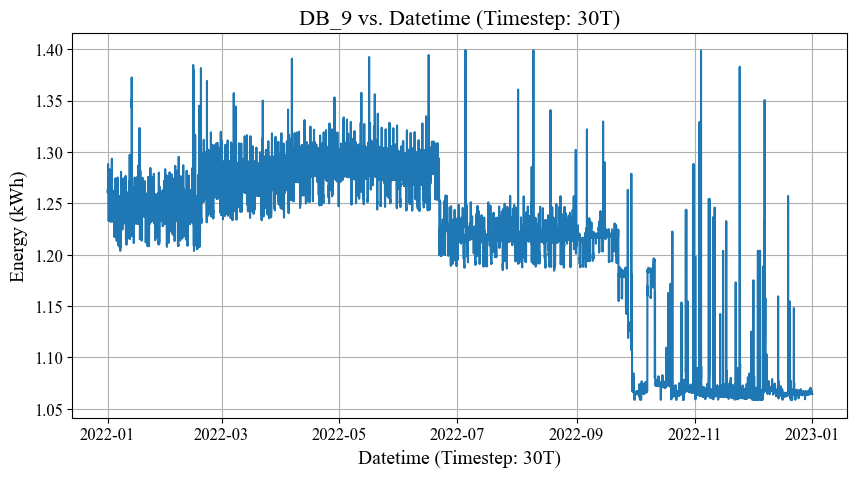

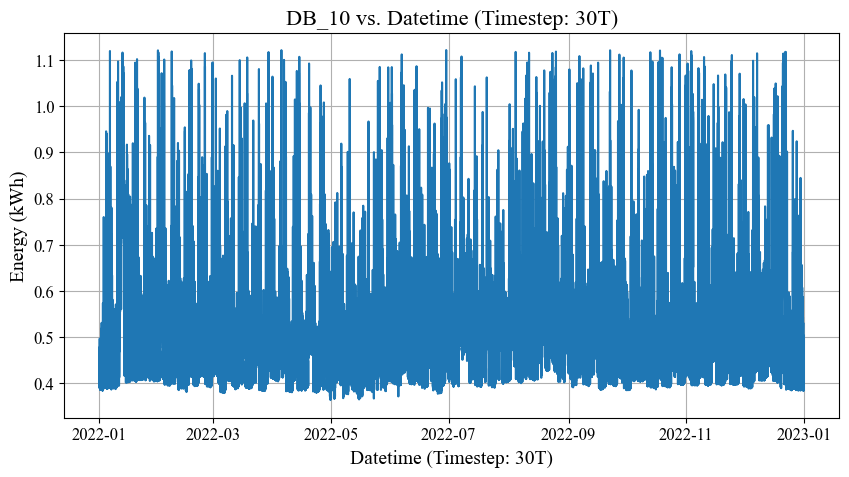

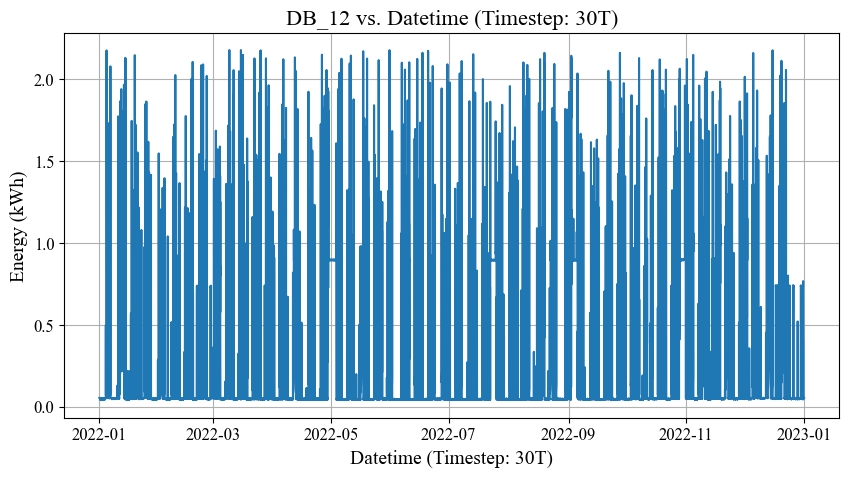

In [72]:
visualize.DataViz(new_test, plot_styles.MatPlotLibPlot()).plotter()

In [26]:
# test_groupby = new_test.groupby()
# test_groupby['DB_10'].plot()
# test_groupby

In [67]:
# test_groupby.index

In [68]:
# test_resample = new_test.resample(freq='M', func=np.sum)
# test_resample['DB_10'].plot(kind='bar')
# test_resample['DB_10']

In [69]:
# test_filter = new_test.filter(year=[2022], month=[2], day=[3], hour=[8,9,10,11,12,13,14,15,16,17])
# test_filter['DB_10'].plot()
# test_filter['DB_10']

### Column meta data + timeseries classes

In [18]:
# db_11 = sdp.ColumnVizData(testing_submeters['DB_11'], example_data_dict['column_1'])


In [19]:
# column_lists = sdp.generate_column_classes(testing_submeters, example_data_dict)


### Idea of next step

In [20]:
# data_to_plot = new_test.filter()

# new_test.plot(matplotlibViz)

# def plot(self, list_col_to_plot:list[tuple[str,...]]|None=None, viz:LibraryViz)
  
#   for c in list_col_to_plot:
#     key_args = self.get_metatdata(c)
#     viz.plot(data_to_plot[c], key_args )

---

## Secondary example

In [21]:
import src.chpqa_test_files.import_data as import_data

user_path =  Path(r"/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/") # Rhys
#user_path =  Path(r"/Users/sceac10/Library/CloudStorage/GoogleDrive-alexandre.canet@e2s.energy/Shared drives/") # Alex
path = user_path / r"e2s-softwares/Lyra/06 - Prototypes/CHPQA/03 - Data/"

dataf = import_data.compile_data(path).pipe(import_data.clean_data).pipe(import_data.transform_raw_dataf)
dataf = dataf.loc[dataf.index.drop_duplicates()]

In [22]:
cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

test = sdp.DataPrep(dataf, cleaner_list)

Prior to cleaning:


,CHP_electricity,CHP_total_heat,CHP_heat,CHP_gas,Boiler_1_heat,Boiler_2_heat,Boiler_3_heat,Boiler_1_gas,Boiler_2_gas,Boiler_3_gas,Total_heat_MWh,Total_gas_MWh
Count,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04
NaN Count,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Mean,0.520265,0.395913,0.395913,1.258410e+02,0.028807,0.174555,0.263088,3.448231,20.674429,31.133961,0.862363,1.810976e+02
StD,0.143987,0.134149,0.134149,3.473529e+01,0.116720,0.208813,0.325645,13.416414,23.658229,38.386887,0.383523,5.057193e+01
Min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,4.700000e+01
25%,0.523000,0.400000,0.400000,1.270000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.430000e+02
50%,0.570000,0.400000,0.400000,1.380000e+02,0.000000,0.100000,0.000000,0.000000,13.000000,0.000000,0.800000,1.760000e+02
75%,0.584000,0.500000,0.500000,1.410000e+02,0.000000,0.300000,0.600000,0.000000,36.000000,69.000000,1.200000,2.220000e+02
99%,0.590000,0.600000,0.600000,1.440000e+02,0.700000,0.700000,0.900000,81.000000,83.000000,108.000000,1.700000,2.830000e+02


Post cleaning:


,CHP_electricity,CHP_total_heat,CHP_heat,CHP_gas,Boiler_1_heat,Boiler_2_heat,Boiler_3_heat,Boiler_1_gas,Boiler_2_gas,Boiler_3_gas,Total_heat_MWh,Total_gas_MWh
Count,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.0,17520.000000,17520.000000,17520.0,17520.000000,17520.000000,17520.000000,1.752000e+04
NaN Count,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00
Mean,0.558354,0.425817,0.425817,1.350063e+02,0.0,0.171312,0.263088,0.0,20.443276,31.133961,0.861707,1.810195e+02
StD,0.031884,0.078529,0.078529,7.402979e+00,0.0,0.200155,0.325645,0.0,22.978181,38.386887,0.381857,5.006251e+01
Min,0.434000,0.299000,0.299000,1.060000e+02,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.700000e+01
1%,0.470000,0.300000,0.300000,1.150000e+02,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.300000,4.800000e+01
25%,0.537000,0.400000,0.400000,1.300000e+02,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.430000e+02
50%,0.574000,0.400000,0.400000,1.380000e+02,0.0,0.100000,0.000000,0.0,13.000000,0.000000,0.800000,1.760000e+02
75%,0.584000,0.500000,0.500000,1.410000e+02,0.0,0.300000,0.600000,0.0,36.000000,69.000000,1.200000,2.220000e+02
99%,0.590000,0.600000,0.600000,1.440000e+02,0.0,0.700000,0.900000,0.0,78.682208,108.000000,1.700000,2.810000e+02


In [23]:
chpqa_data_dict = {'column_1': {'Name': 'CHP_electricity', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_2': {'Name': 'CHP_total_heat', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_3': {'Name': 'CHP_heat', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_4': {'Name': 'CHP_gas', 
                                  'Units': viz_enums.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_5': {'Name': 'Boiler_1_heat', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_6': {'Name': 'Boiler_2_heat', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_7': {'Name': 'Boiler_3_heat', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_8': {'Name': 'Boiler_1_gas', 
                                  'Units': viz_enums.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_9': {'Name': 'Boiler_2_gas', 
                                  'Units': viz_enums.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_10': {'Name': 'Boiler_3_gas', 
                                  'Units': viz_enums.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_11': {'Name': 'Total_heat_MWh', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_12': {'Name': 'Total_gas_MWh', 
                                  'Units': viz_enums.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT}}

AttributeError: MWH

In [ ]:
column_lists = sdp.generate_column_classes(dataf, chpqa_data_dict)

In [ ]:
column_lists[0].data.min()

0.0

In [ ]:
# data_with_meta.groupby('day', )
matplotlib_viz = MatplotlibViz()


def single_timeserie_plot(libraryViz, data, **kwargs):
    libraryViz.basic_plot(data, **kwargs)


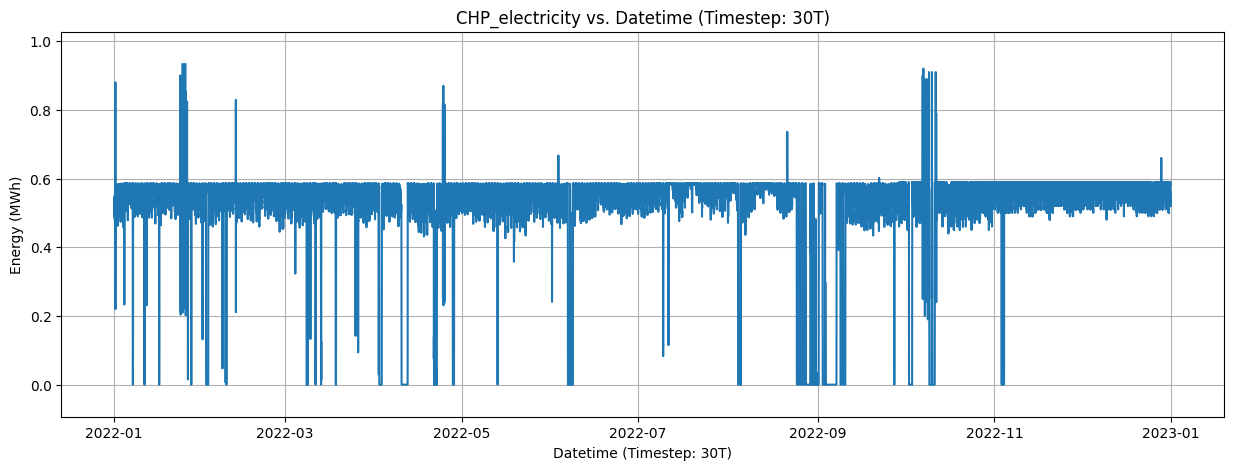

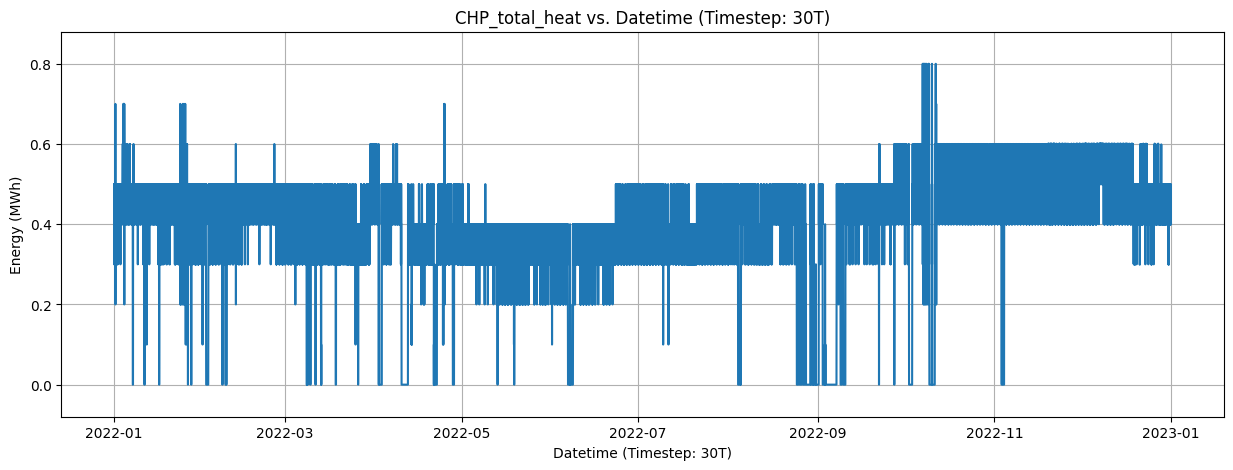

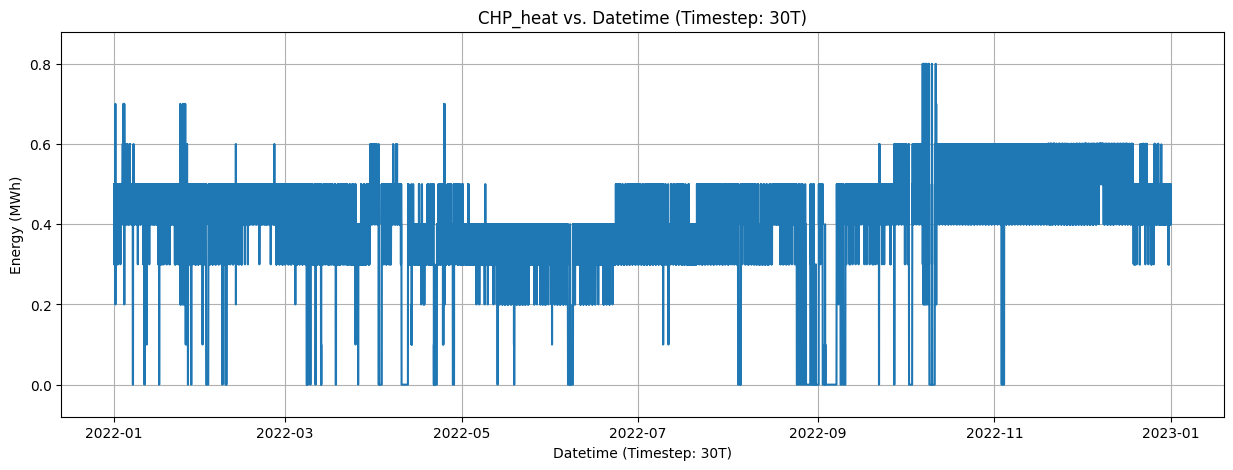

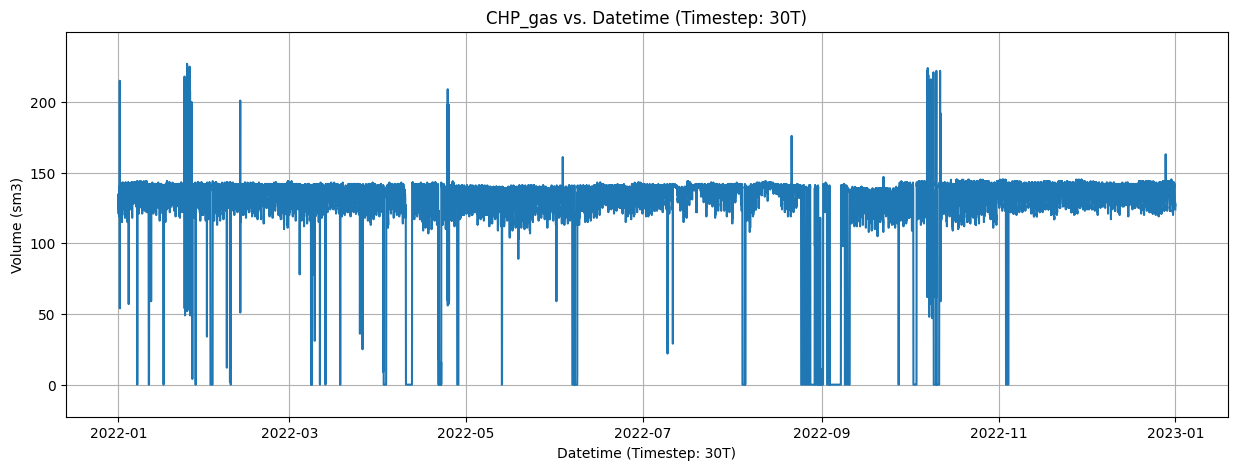

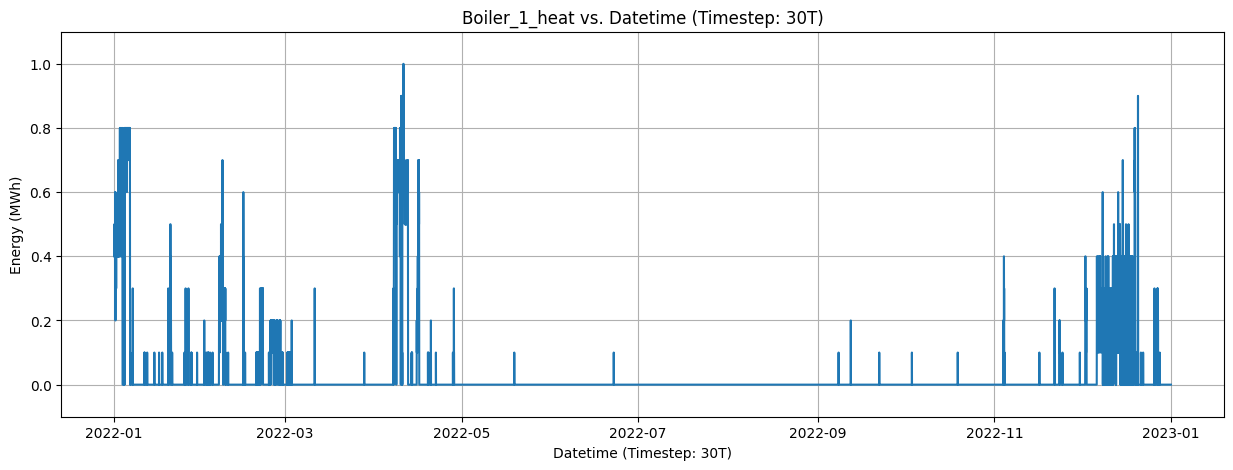

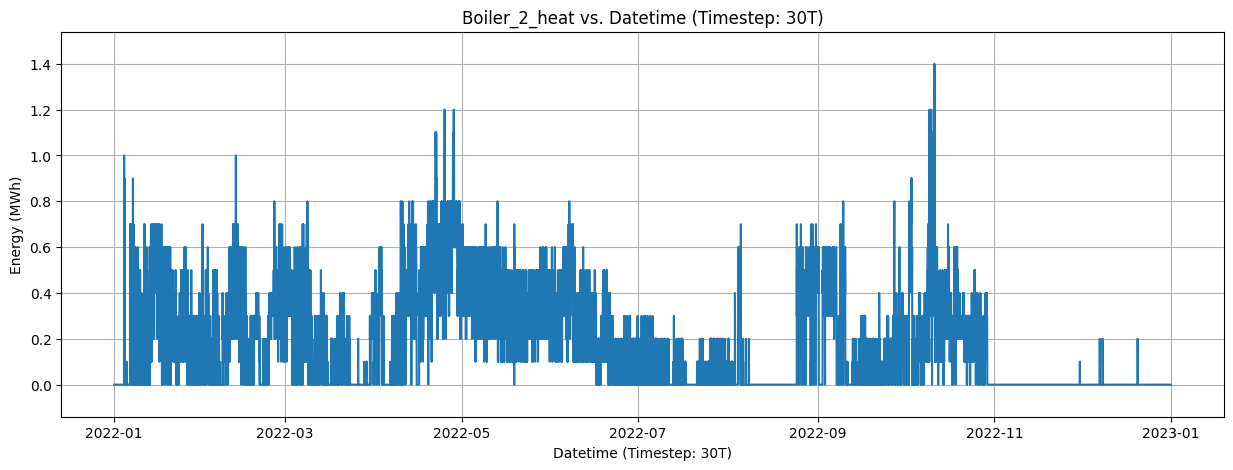

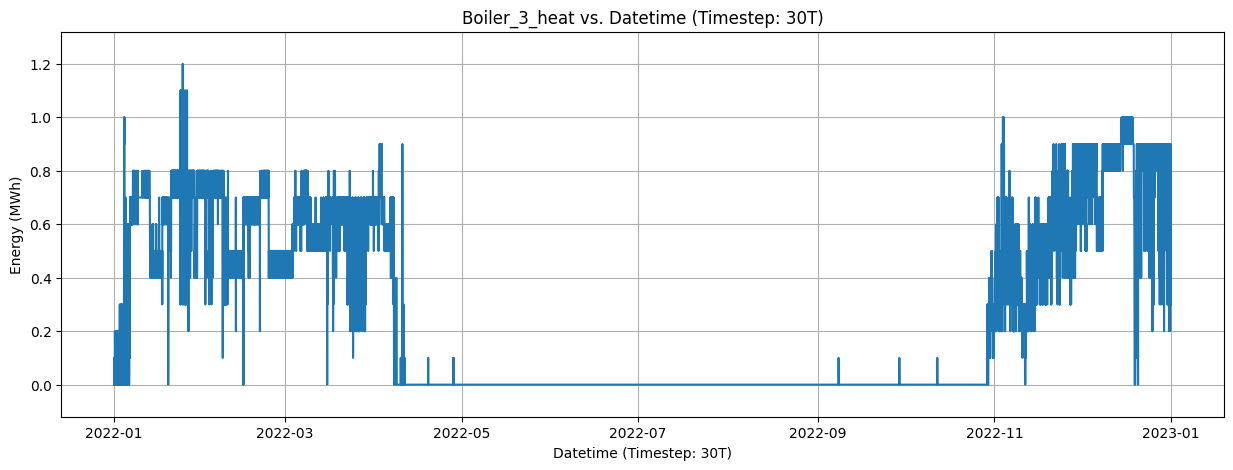

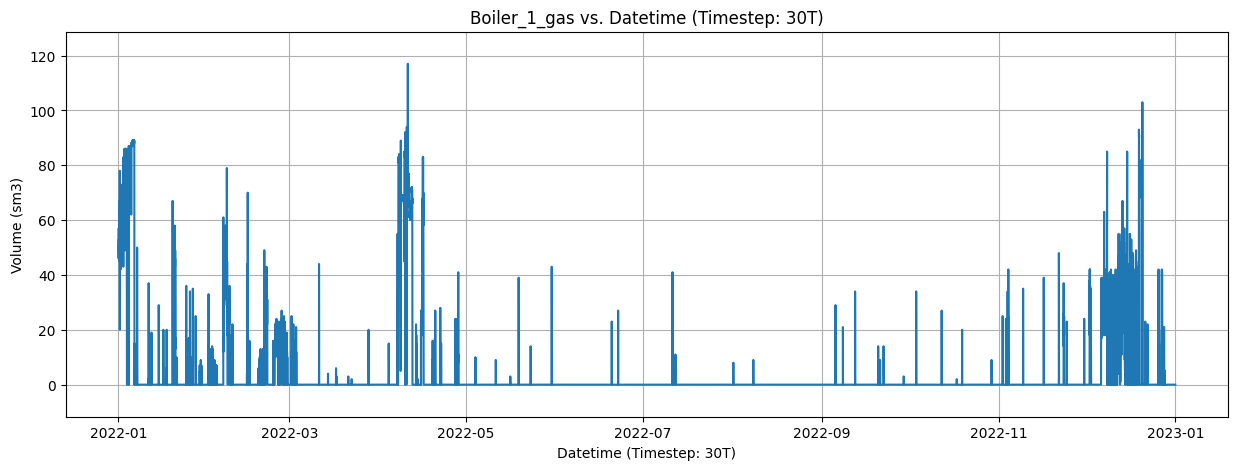

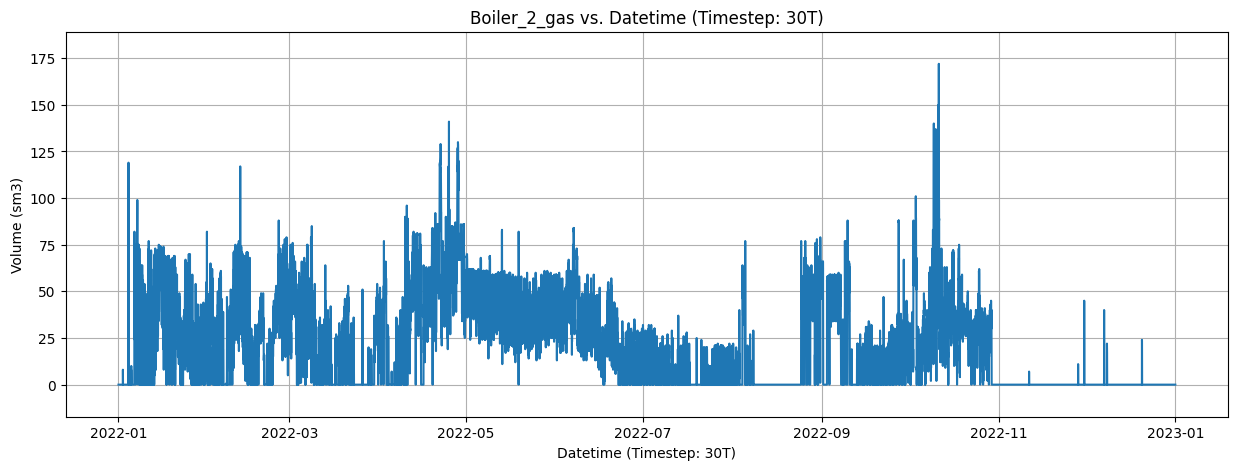

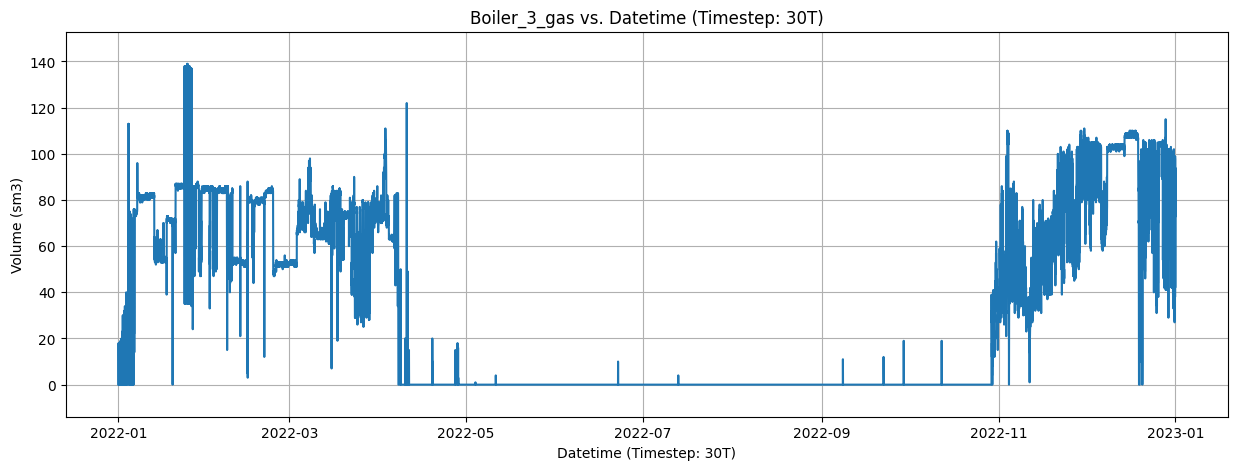

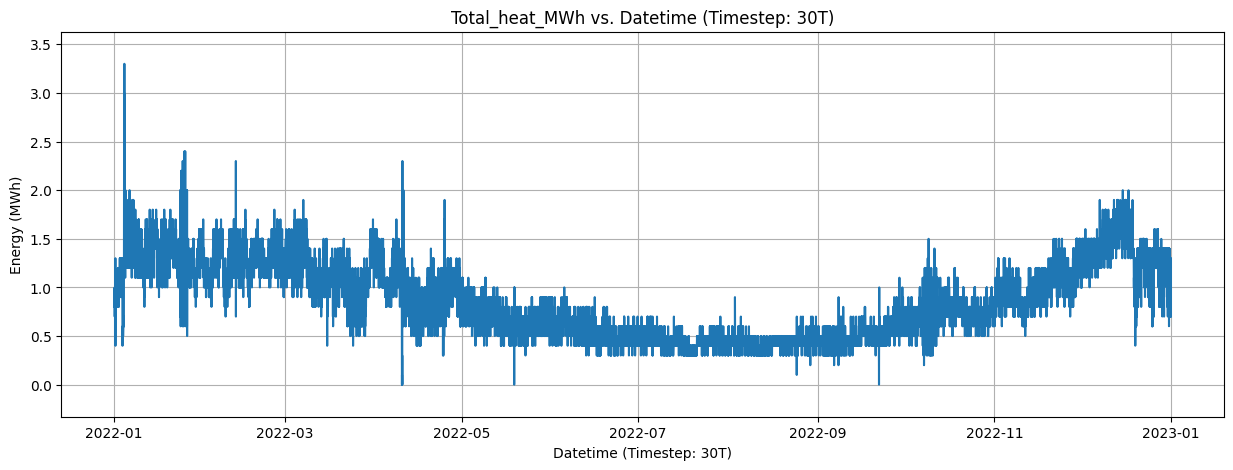

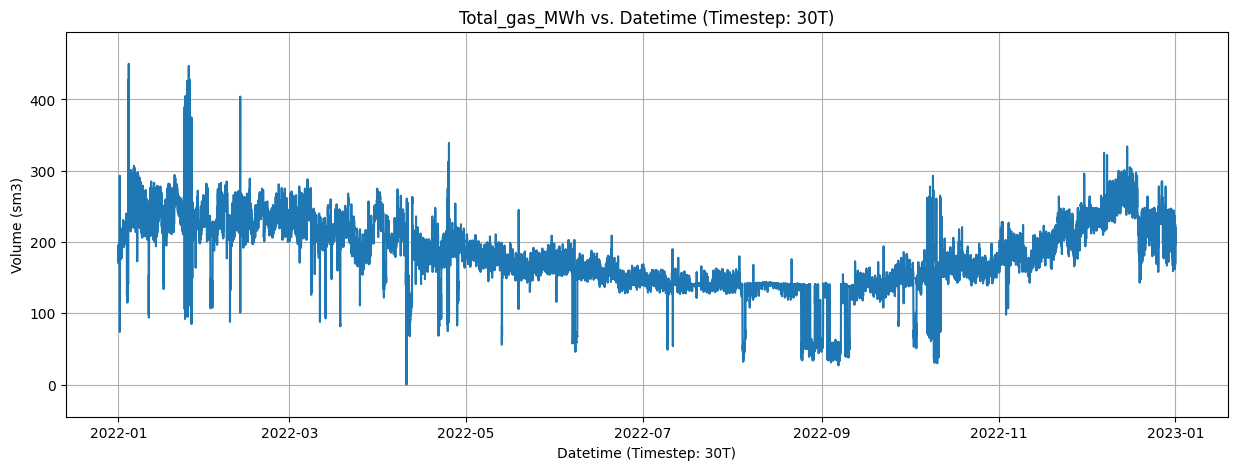

In [ ]:
for i in range(len(column_lists)):
    column_lists[i].plot_all()